## Pororo

In [2]:
!git clone https://github.com/yunwoong7/korean_ocr_using_pororo.git

!mv korean_ocr_using_pororo/* .

!pip install wget

fatal: destination path 'korean_ocr_using_pororo' already exists and is not an empty directory.
mv: cannot stat 'korean_ocr_using_pororo/*': No such file or directory


In [3]:
!pip install torchvision==0.13
# 세션 다시 시작

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.1+cu121 requires torch==2.4.1, but you have torch 1.12.0 which is incompatible.


In [1]:
!pip install Pillow==9.5.0
# 세션 다시 시작

In [ ]:
# 폰트목록 확인
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

# 새 섹션

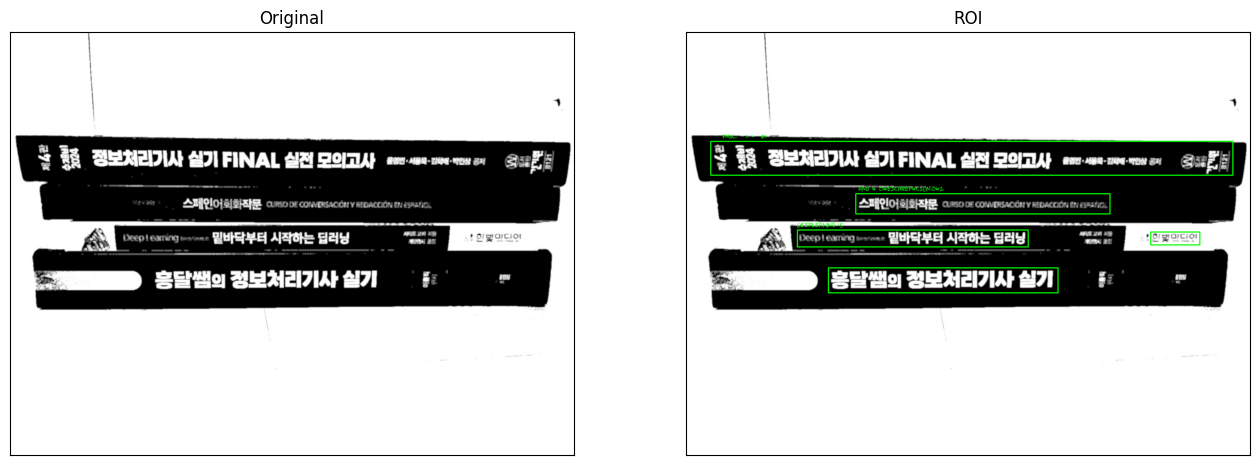

["등 활혈 정보자리기사 일기 FNAL, 버전 문의그사 윤영반=서울욱 '덕배-박인상 공지 @=티",
 '스페인아시화작물 anb w owescarepwcsun.ows,',
 "Deepleaning '스바5이까 밑바닥부터 시작하는 딜러닝",
 '흰빛믹딘인',
 '홍달샘의 정보처리기사 실기']

In [6]:
from main import PororoOcr

ocr = PororoOcr()

img_path =

# 오류나면 폰트 수정
ocr.run_ocr(img_path, debug=True)

## 이미지 전처리(YOLO 적용 전)

In [38]:
import cv2
#필요한 부분만 주석 제외하면서 적용
def preprocess_image_with_blur(img_path):
    # 이미지 읽기
    image = cv2.imread(img_path)

    # 그레이스케일 변환
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용 (커널 사이즈는 5x5)
    #blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # 흑백 반전
    #inverted_image = cv2.bitwise_not(blurred_image)

    # 이진화
    #binary_image = cv2.threshold(inverted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return gray_image

# 사용 예시
img_path = 'assets/images/ver.jpg'  # 전처리할 이미지 경로
processed_image = preprocess_image_with_blur(img_path)

# 전처리된 이미지 저장
cv2.imwrite('assets/images/processed_image_with_blur.jpg', processed_image)


True

## YOLO + PORORO

In [2]:
!pip install ultralytics #YOLO8 설치(코랩)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 24.3 MB/s eta 0:00:00



0: 480x640 5 books, 15.4ms
Speed: 3.0ms preprocess, 15.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
책 0 이미지가 book_0.jpg에 저장되었습니다.
책 1 이미지가 book_1.jpg에 저장되었습니다.
책 2 이미지가 book_2.jpg에 저장되었습니다.
책 3 이미지가 book_3.jpg에 저장되었습니다.
책 4 이미지가 book_4.jpg에 저장되었습니다.


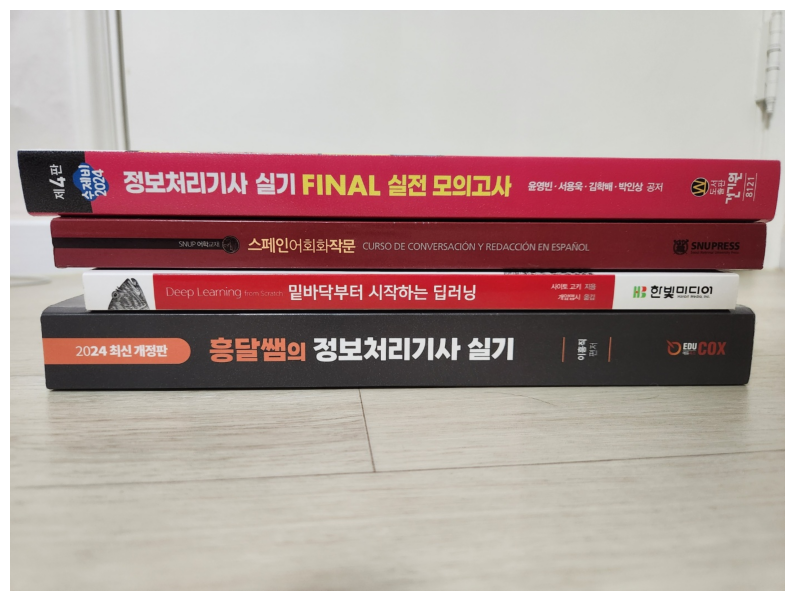

In [49]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 이미지 읽기
img_path = 'assets/images/ver.jpg'  # 감지할 책 이미지 경로
image = cv2.imread(img_path)

# YOLOv8 모델 로드 (사전 학습된 모델 사용)
model = YOLO('yolov8s.pt')  # YOLOv8s 모델 파일 로드

# 객체 감지 수행 (책 감지)
results = model(image)  # 이미지에 대해 객체 감지 수행

# 감지된 객체들의 바운딩 박스 정보
boxes = results[0].boxes  # 바운딩 박스 정보

# 감지된 책을 하나씩 잘라내기
for i, box in enumerate(boxes):
    # 바운딩 박스 좌표 추출 (x1, y1, x2, y2)
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # 좌표 정보를 정수로 변환

    # 책 이미지 잘라내기
    book_image = image[y1:y2, x1:x2]

    # 잘라낸 책 이미지 저장
    cropped_image_path = f'book_{i}.jpg'  # 각 책에 대한 이미지 파일 경로
    cv2.imwrite(cropped_image_path, book_image)
    print(f"책 {i} 이미지가 {cropped_image_path}에 저장되었습니다.")

# 원본 이미지 표시 (matplotlib 사용)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


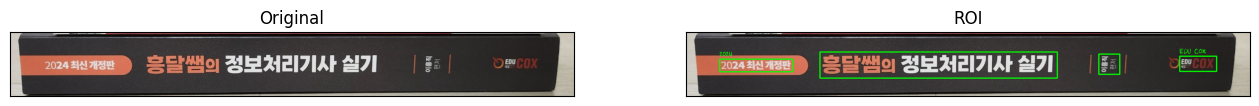

book_1.jpg의 OCR 결과: 응달샘의 정보처리기사 실기


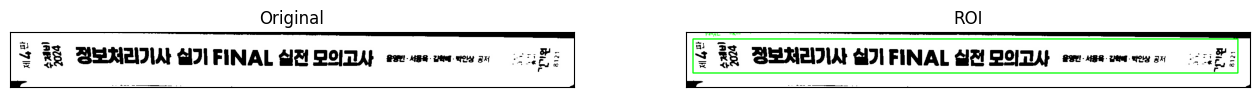

book_0_processed.jpg의 OCR 결과: 쿨 흉틀 정보처리기사 실기 FINAL 심천 모의고사 출혈인-k종유-강에- 북인싱 공저 크는'등


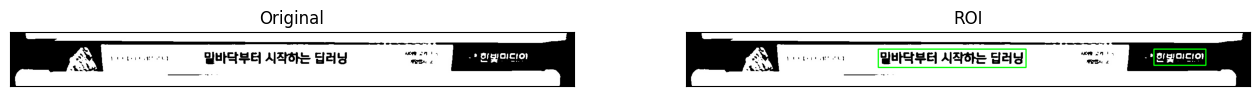

book_4_processed.jpg의 OCR 결과: 밑바닥부터 시작하는 딥러닝


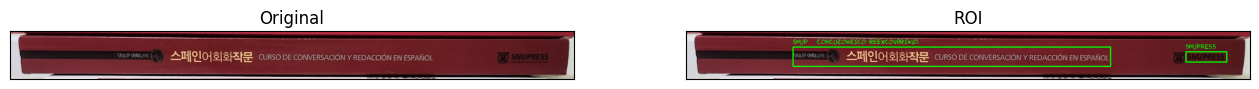

book_2.jpg의 OCR 결과: SNUP 어학교재 스페인어흐트작문 concuzowesco reexcovarswio.


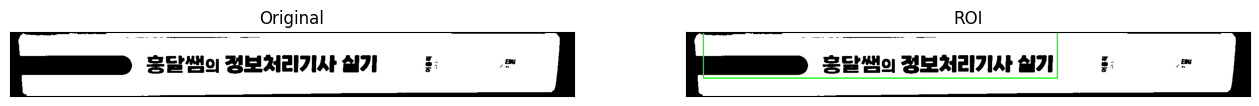

book_1_processed.jpg의 OCR 결과: ( 홍달샘의 정보처리기사 쇠기


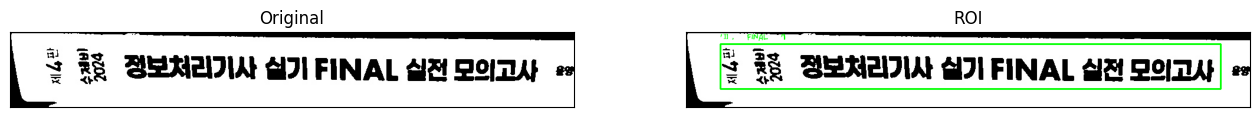

book_3_processed.jpg의 OCR 결과: ']] 홀, 정보처리기사 성기 FINAL 심진 모의교사 '1


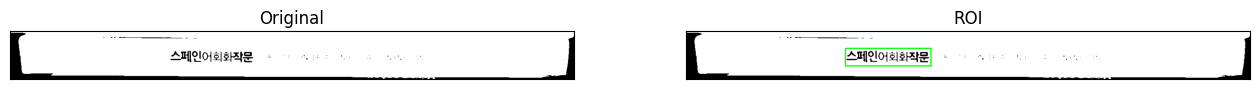

book_2_processed.jpg의 OCR 결과: 스페인어회화작문


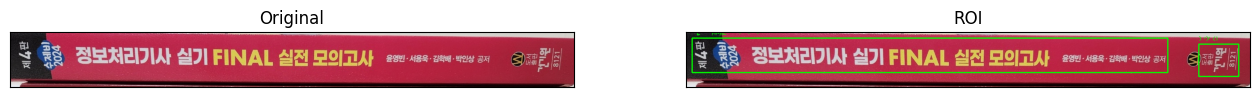

book_0.jpg의 OCR 결과: 권가도 'E' 정보처리기사 실기 FINAL 실전 모의고사 운영빈 - 서용욱 - 김학배 -박인상 공저


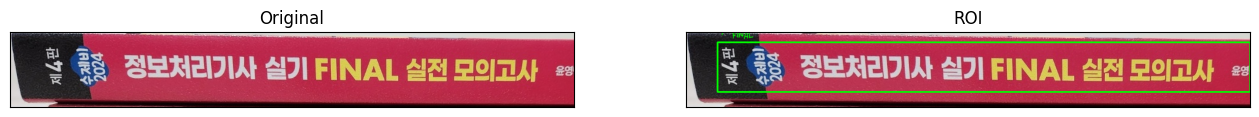

book_3.jpg의 OCR 결과: 금기도 '보처리기사 실기 FINAL 실전 모의고사 윤영


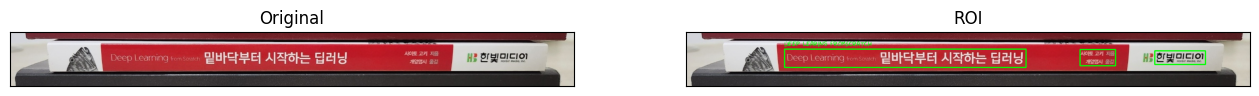

book_4.jpg의 OCR 결과: Deep Learing fromscratch 밑바닥부터 시작하는 딥러닝


In [50]:
import cv2
from main import PororoOcr
import os

# OCR 객체 생성
ocr = PororoOcr()

# 저장된 책 이미지 폴더 경로
books_folder = './'  # 현재 디렉토리에서 책 이미지 찾기
book_images = [f for f in os.listdir(books_folder) if f.startswith('book_') and f.endswith('.jpg')]

# 각 책 이미지에 대해 OCR 실행
for book_image in book_images:
    # 책 이미지 경로
    image_path = os.path.join(books_folder, book_image)

    # 이미지 읽기
    book_img = cv2.imread(image_path)

    # OCR 실행
    ocr_results = ocr.run_ocr(image_path, debug=True)  # OCR 결과 얻기

    # OCR 결과 출력
    print(f"{book_image}의 OCR 결과: {ocr_results[0]}")  # 첫 번째 요소 출력 (추출된 텍스트)




0: 480x640 1 laptop, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


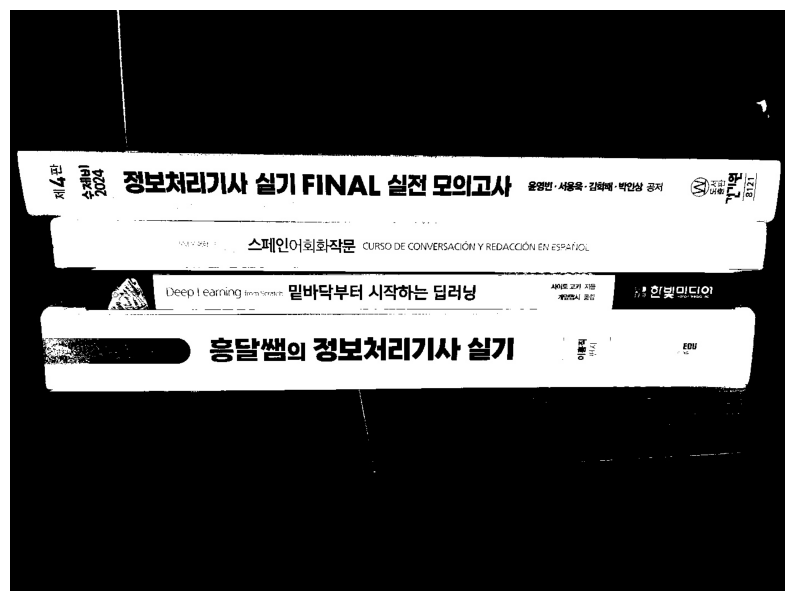

In [41]:
import cv2
from ultralytics import YOLO
from main import PororoOcr
import matplotlib.pyplot as plt
import os

# 원본 이미지 읽기
original_img_path = 'assets/images/processed_image.jpg'  # 원본 이미지 경로
original_image = cv2.imread(original_img_path)

# YOLOv8 모델 로드
model = YOLO('yolov8s.pt')
results = model(original_image)  # 원본 이미지에서 객체 감지

# OCR 객체 생성
ocr = PororoOcr()

# 책 제목 찾기
target_title = '홍달샘의 정보처리기사 실기'

# 객체 감지 결과에서 바운딩 박스 정보 얻기
boxes = results[0].boxes

# 바운딩 박스와 OCR 결과를 확인하여 일치하는 책 제목 찾기
for i, box in enumerate(boxes):
    # 바운딩 박스 좌표 추출
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

    # 책 이미지 잘라내기
    book_image = original_image[y1:y2, x1:x2]

    # OCR 실행
    ocr_results = ocr.run_ocr(book_image, debug=False)  # OCR 결과 얻기
    extracted_text = ocr_results[0]  # 첫 번째 요소에서 텍스트 추출

    # 텍스트 매칭 확인
    if target_title in extracted_text:
        # 바운딩 박스 표시
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # 초록색 박스

# 결과 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


##YOLO 적용 후 전처리(ver2)

In [42]:
##YOLO 적용 후 전처리(ver2)

In [45]:
import cv2

# 그레이스케일, 흑백 반전, 이진화, 가우시안 블러 적용 함수
def preprocess_image(img_path):
    # 이미지 읽기
    image = cv2.imread(img_path)

    # 그레이스케일 변환
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용 (커널 사이즈는 5x5)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # 흑백 반전
    inverted_image = cv2.bitwise_not(blurred_image)

    # 이진화 (Otsu의 이진화 방법 사용)
    _, binary_image = cv2.threshold(inverted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image

# 전처리된 이미지 저장
img_path = 'assets/images/ver.jpg'  # 전처리할 이미지 경로
processed_image = preprocess_image(img_path)
cv2.imwrite('assets/images/processed_image_with_preprocessing.jpg', processed_image)


True

책 0 전처리된 이미지가 book_0_processed.jpg에 저장되었습니다.
책 1 전처리된 이미지가 book_1_processed.jpg에 저장되었습니다.
책 2 전처리된 이미지가 book_2_processed.jpg에 저장되었습니다.
책 3 전처리된 이미지가 book_3_processed.jpg에 저장되었습니다.
책 4 전처리된 이미지가 book_4_processed.jpg에 저장되었습니다.


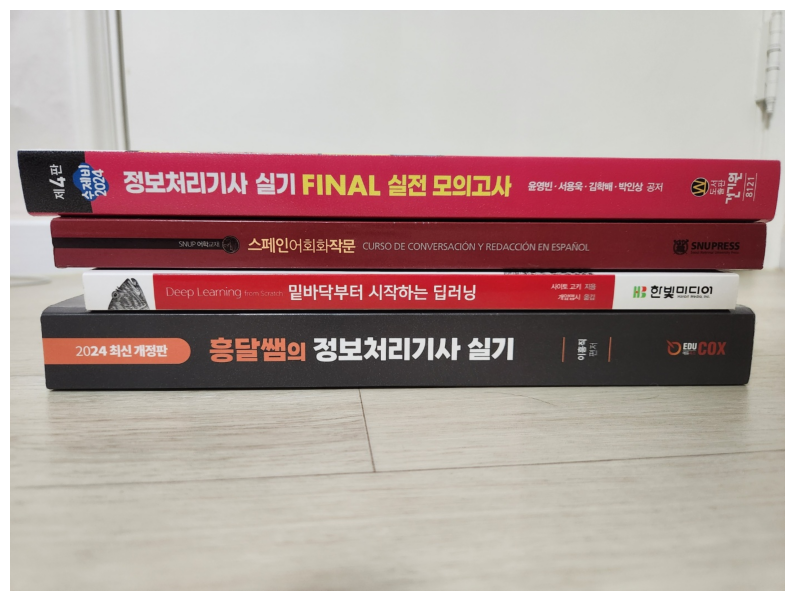

In [46]:
import cv2
import matplotlib.pyplot as plt

# 이미지 전처리 함수
def preprocess_image(image):
    # 그레이스케일 변환
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용 (커널 사이즈는 5x5)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # 흑백 반전
    inverted_image = cv2.bitwise_not(blurred_image)

    # 이진화
    _, binary_image = cv2.threshold(inverted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image

# 감지된 책을 하나씩 잘라내고 전처리 적용
for i, box in enumerate(boxes):
    # 바운딩 박스 좌표 추출 (x1, y1, x2, y2)
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # 좌표 정보를 정수로 변환

    # 책 이미지 잘라내기
    book_image = image[y1:y2, x1:x2]

    # 전처리 적용
    processed_book_image = preprocess_image(book_image)

    # 잘라낸 책 이미지 저장 (전처리 적용 후)
    cropped_image_path = f'book_{i}_processed.jpg'  # 전처리된 이미지 파일 경로
    cv2.imwrite(cropped_image_path, processed_book_image)
    print(f"책 {i} 전처리된 이미지가 {cropped_image_path}에 저장되었습니다.")

# 원본 이미지 표시 (matplotlib 사용)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


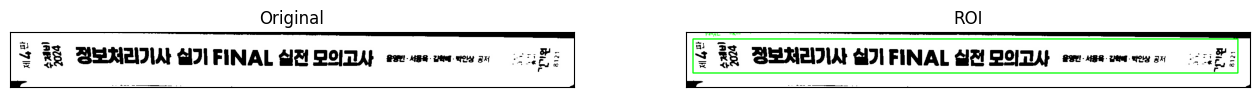

book_0_processed.jpg의 OCR 결과: 쿨 흉틀 정보처리기사 실기 FINAL 심천 모의고사 출혈인-k종유-강에- 북인싱 공저 크는'등


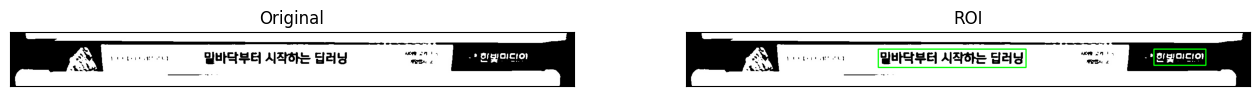

book_4_processed.jpg의 OCR 결과: 밑바닥부터 시작하는 딥러닝


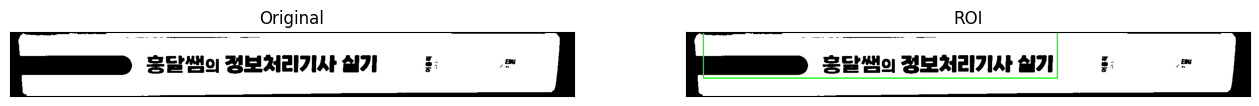

book_1_processed.jpg의 OCR 결과: ( 홍달샘의 정보처리기사 쇠기


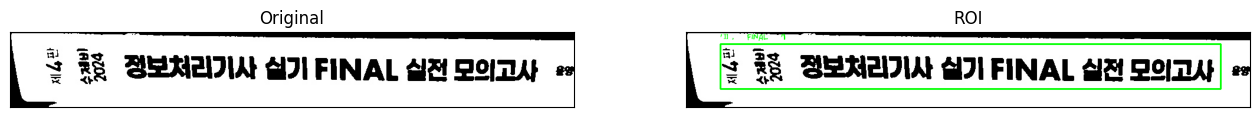

book_3_processed.jpg의 OCR 결과: ']] 홀, 정보처리기사 성기 FINAL 심진 모의교사 '1


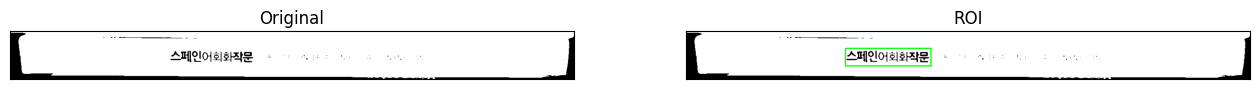

book_2_processed.jpg의 OCR 결과: 스페인어회화작문


In [47]:
import cv2
from main import PororoOcr
import os

# OCR 객체 생성
ocr = PororoOcr()

# 저장된 책 이미지 폴더 경로
books_folder = './'  # 현재 디렉토리에서 책 이미지 찾기
# 전처리된 이미지 파일만 가져오기
book_images = [f for f in os.listdir(books_folder) if f.startswith('book_') and f.endswith('_processed.jpg')]

# 각 책 이미지에 대해 OCR 실행
for book_image in book_images:
    # 책 이미지 경로
    image_path = os.path.join(books_folder, book_image)

    # 이미지 읽기
    book_img = cv2.imread(image_path)

    # OCR 실행
    ocr_results = ocr.run_ocr(image_path, debug=True)  # OCR 결과 얻기

    # OCR 결과 출력
    print(f"{book_image}의 OCR 결과: {ocr_results[0]}")  # 첫 번째 요소 출력 (추출된 텍스트)



0: 480x640 1 laptop, 15.4ms
Speed: 3.0ms preprocess, 15.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


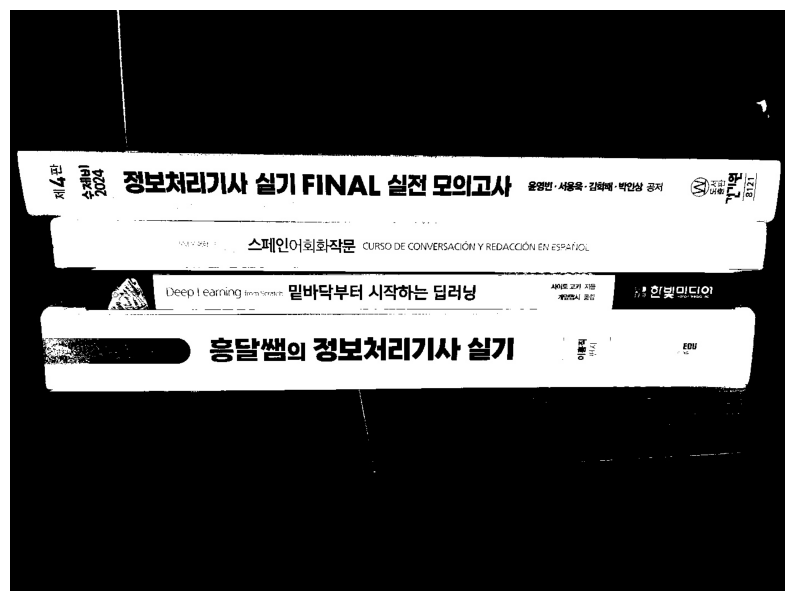

In [48]:
import cv2
from ultralytics import YOLO
from main import PororoOcr
import matplotlib.pyplot as plt

# 이미지 전처리 함수
def preprocess_image(image):
    # 그레이스케일 변환
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용 (커널 사이즈는 5x5)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # 흑백 반전
    inverted_image = cv2.bitwise_not(blurred_image)

    # 이진화
    _, binary_image = cv2.threshold(inverted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image

# 원본 이미지 읽기
original_img_path = 'assets/images/processed_image.jpg'  # 원본 이미지 경로
original_image = cv2.imread(original_img_path)

# YOLOv8 모델 로드
model = YOLO('yolov8s.pt')
results = model(original_image)  # 원본 이미지에서 객체 감지

# OCR 객체 생성
ocr = PororoOcr()

# 책 제목 찾기
target_title = '스페인어회화작문'

# 객체 감지 결과에서 바운딩 박스 정보 얻기
boxes = results[0].boxes

# 바운딩 박스와 OCR 결과를 확인하여 일치하는 책 제목 찾기
for i, box in enumerate(boxes):
    # 바운딩 박스 좌표 추출
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

    # 책 이미지 잘라내기
    book_image = original_image[y1:y2, x1:x2]

    # 책 이미지 전처리
    processed_book_image = preprocess_image(book_image)

    # OCR 실행 (전처리된 이미지 사용)
    ocr_results = ocr.run_ocr(processed_book_image, debug=False)  # OCR 결과 얻기
    extracted_text = ocr_results[0]  # 첫 번째 요소에서 텍스트 추출

    # 텍스트 매칭 확인
    if target_title in extracted_text:
        # 바운딩 박스 표시 (초록색)
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # 초록색 박스

# 결과 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
